# Markov Decision Process

## Section 1: Introduction

In this section, we will introduce the concepts of MDP, Q-values, and V-values. These concepts are fundamental to the field of AI and machine learning, as they are used to model **decision-making problems** in various domains such as "robotics", "finance", and "healthcare".

MDP stands for Markov Decision Process. It is a mathematical framework for modeling decision-making problems in which the outcomes are partly random and partly under the control of a decision-maker. MDPs are defined by a set of states, a set of actions, a reward function, and a transition function. The goal is to find a policy that maximizes the expected cumulative reward over time.

Q-values and V-values are two important concepts in the context of MDPs. A Q-value represents the expected cumulative reward of taking a particular action in a particular state and following a specific policy thereafter. A V-value represents the expected cumulative reward of being in a particular state and following a specific policy thereafter. These values are used to evaluate and improve the policy of an agent in an MDP.

## Section 2: The Basics of MDPs

In this section, we will explain the basic components of an MDP.

An MDP is defined by "a set of states", "a set of actions", "a reward function", and "a transition function". The state space is the set of all possible states that the agent can be in. The action space is the set of all possible actions that the agent can take. The reward function defines the reward the agent receives for each action taken in a particular state. The transition function defines the probability of moving from one state to another state after taking a particular action.

To illustrate these concepts, let's consider an example of a **robot that needs to navigate through a maze**. The robot can be in one of several states, such as at the start of the maze, at a junction in the maze, or at the end of the maze. This robot takes an action. With Probability of **0.8** It goes in that desired direction but with probability of **0.2** It goes in the perpendicular direction (0.1, 0.1 for each)!

In an MDP, the agent interacts with the environment by selecting actions based on its current state and the expected future reward. The goal of the agent is to find a policy that maximizes the expected cumulative reward over time.

**QUESTION**

1. What are the state space, action space, reward function, and transition function of the robot in the maze example? Explain why you think each of these components is important for the robot to navigate through the maze.

2. Is our environment stochastic or deterministic? Why?!

**Define The MDP**:

Based on your choice of rewards and transitions and the state space, define the MDP for the robot in the maze example. You can complete the following code to define the MDP:

In [30]:
import numpy as np

# Definition of the maze
maze = np.array([[2, 0, 0, 0, 0],
                 [0, 1, 1, 0, 1],
                 [0, 0, 0, 0, 0],
                 [0, 1, 1, 1, 3]])

print("Our Maze is: \n", maze)

# Define the states and actions
states = np.arange(np.prod(maze.shape))
actions = ['UP', 'DOWN', 'LEFT', 'RIGHT'] 

# Define the reward function
rewards = np.zeros(maze.shape)   
rewards[maze == 1] = -10  # assign negative rewards for hitting walls
rewards[maze == 3] = 10 # assign positive rewards for reaching the goal
rewards[maze == 0] = -1 # assign negative rewards for each step


# Set the discount factor
discount = 0.9

# Define the initial value function
values = np.zeros(maze.shape)
values[maze == 3] = 100  
values[maze == 2] = -10
# values[maze == 2] = -2

Our Maze is: 
 [[2 0 0 0 0]
 [0 1 1 0 1]
 [0 0 0 0 0]
 [0 1 1 1 3]]


## Section 3: Computing V-values

In this section, we will explain how to compute V-values for an MDP using the Bellman equation.

The Bellman equation is a recursive equation that expresses the value of a state in terms of the values of its successor states. It is defined as:

$$V(s) = R(s) + \gamma * \max_a (\sum_{s'} P(s, a, s') * V(s'))$$

where V(s) is the value of state s, R(s) is the reward for being in state s, γ is the discount factor that determines the importance of future rewards, P(s, a, s') is the probability of moving from state s to state s' after taking action a, and max_a is the maximum over all possible actions a.

To compute the V-values for an MDP, we start with an initial estimate of the V-values and update them iteratively using the Bellman equation until they converge to the true values. The update rule is:

$$V(s) \leftarrow R(s) + \gamma * \max_a (\sum_{s'} P(s, a, s') * V(s'))$$

We can use dynamic programming algorithms such as value iteration or policy iteration to compute the V-values.

We can use the Bellman equation to compute the V-values for each state in the maze. The V-values represent the expected cumulative reward that the robot can obtain if it starts from that state and follows an optimal policy thereafter. Complete the code below:

(**Note:** your final result can be slightly different from the result printed below and it's okay!)

In [31]:
# TODO: Compute the V-values using Bellman equations
...


def get_next_value(state, action,discount):
    """
    Returns the next state and reward given the current state and action.
    Assumes deterministic actions.
    """
    next_state = state
    n = maze.shape[0]
    m = maze.shape[1]
    row, col = state
    rev = rewards[maze == 1][0]
    if action == 'UP' :
        perp1 = rev
        perp1_val = values[state]
        perp2 = rev
        perp2_val = values[state]
        right_dir = rev 
        right_val = values[state]
        if col > 0 and col < m- 1 :
            perp1 = rewards[row,col - 1]
            perp2 = rewards[row,col + 1]
            perp1_val = values[row,col-1]
            perp2_val = values[row,col+1]
        elif col == m - 1 :
            perp1 = rewards[row,col - 1]
            perp1_val = values[row,col -1]
        elif col == 0 :
            perp2 = rewards[row,col + 1]
            perp2_val = values[row,col +1]
        if row > 0 :
            right_dir = rewards[row-1,col]
            right_val = values[row - 1,col] 
        reward = 0.8 * (right_dir + discount * right_val) + 0.1 * (perp1 + discount * perp1_val) + 0.1 * (perp2 + discount * perp2_val)
    elif action == 'DOWN' :
        perp1 = rev
        perp1_val = values[state]
        perp2 = rev
        perp2_val = values[state]
        right_dir = rev 
        right_val = values[state]
        if col > 0 and col < m - 1 :
            perp1 = rewards[row,col - 1]
            perp2 = rewards[row,col + 1]
            perp1_val = values[row,col-1]
            perp2_val = values[row,col+1]
        elif col == m - 1 :
            perp1 = rewards[row,col - 1]
            perp1_val = values[row,col -1]
        elif col == 0 :
            perp2 = rewards[row,col + 1]
            perp2_val = values[row,col +1]
        if row < n -1 :
            right_dir = rewards[row+1,col] 
            right_val = values[row+1,col]
        reward = 0.8 * (right_dir + discount * right_val) + 0.1 * (perp1 + discount * perp1_val) + 0.1 * (perp2 + discount * perp2_val)
    elif action == 'LEFT' : 
        perp1 = rev
        perp1_val = values[state]
        perp2 = rev
        perp2_val = values[state]
        right_dir = rev 
        right_val = values[state]
        if row > 0 and row < n - 1 :
            perp1 = rewards[row - 1, col]
            perp2 = rewards[row + 1, col]
            perp1_val = values[row - 1,col]
            perp2_val = values[row + 1,col]
        elif row == n - 1 :
            perp1 = rewards[row - 1, col]
            perp1_val = values[row - 1,col]
        elif row == 0 :
            perp2 = rewards[row + 1, col]
            perp2_val = values[row + 1,col]
        if col > 0 :
            right_dir = rewards[row, col - 1]
            right_val = rewards[row, col - 1] 
        reward = 0.8 * (right_dir + discount * right_val) + 0.1 * (perp1 + discount * perp1_val) + 0.1 * (perp2 + discount * perp2_val)
    elif action == 'RIGHT' : 
        perp1 = rev
        perp1_val = values[state]
        perp2 = rev
        perp2_val = values[state]
        right_dir = rev 
        right_val = values[state] 
        if row > 0 and row < n - 1 :
            perp1 = rewards[row - 1, col]
            perp2 = rewards[row + 1, col]
            perp1_val = values[row - 1,col]
            perp2_val = values[row + 1,col]
        elif row == n - 1 :
            perp1 = rewards[row - 1, col]
            perp1_val = values[row - 1,col]
        elif row == 0 :
            perp2 = rewards[row + 1, col]
            perp2_val = values[row + 1,col]
        if col < m - 1  :
            right_dir = rewards[row, col + 1] 
            right_val = values[row, col+1]
        reward = 0.8 * (right_dir + discount * right_val) + 0.1 * (perp1 + discount * perp1_val) + 0.1 * (perp2 + discount * perp2_val)
    return reward    

n = maze.shape[0]
m = maze.shape[1]
num_of_itters = 15
epsilon = 0.001
for itter in range(num_of_itters):
    delta = 0
    old_value = np.copy(values)
    for row in range(n):
        for col in range(m):
            state = (row,col)
            new_value = 0
            v = []
            if maze[row,col] == 1 :
                old_value[row,col] = 0
                continue
            elif maze[row,col] == 3 :
                continue
            elif maze[row,col] == 2:
                continue
            for action in actions:
                value = get_next_value(state, action,discount)
                # print(value)
                v.append(value)
            old_value[row,col] = max(v)
    values = np.copy(old_value)
print(values)



[[-10.          16.40583497  24.62761654  35.01675448  -3.86813187]
 [ 16.30333962   0.           0.          47.4289986    0.        ]
 [ 24.50320696  31.34865814  47.4289986   69.76262157  93.60287974]
 [ 16.30333962   0.           0.           0.         100.        ]]


## Section 4: Computing Q-values

In this section, we will explain how to compute Q-values for an MDP using the Bellman equation.

The Q-values represent the expected cumulative reward that the robot can obtain if it starts from a particular state and takes a particular action, and then follows an optimal policy thereafter. The Q-values can be computed using the Bellman equation as follows:

$$Q(s, a) = R(s, a) + \gamma * \sum_{s'} (P(s, a, s') * \max_{a'} (Q(s', a')))$$

where Q(s, a) is the Q-value of state-action pair (s, a), R(s, a) is the reward for taking action a in state s, γ is the discount factor that determines the importance of future rewards, P(s, a, s') is the probability of moving from state s to state s' after taking action a, max_a' is the maximum over all possible actions a' in state s', and sum_s' is the sum over all possible successor states s' of state s.

To compute the Q-values for an MDP, we start with an initial estimate of the Q-values and update them iteratively using the Bellman equation until they converge to the true values. The update rule is:

$$Q(s, a) \leftarrow R(s, a) + \gamma * \sum_{s'} (P(s, a, s') * \max_{a'} (Q(s', a')))$$

We can use dynamic programming algorithms such as Q-learning or SARSA to compute the Q-values.


We can use the Q-learning algorithm to compute the Q-values for each state-action pair in the maze. The Q-values represent the expected cumulative reward that the robot can obtain if it starts from a particular state and takes a particular action, and then follows an optimal policy thereafter. Complete the code below:

(**Note:** your final result can be slightly different from the result printed below and it's okay!)

In [32]:
#TODO: Compute Q-Values using Bellman equations
...
q_values = np.zeros((*maze.shape, len(actions)))
for itter in range(num_of_itters):
    delta = 0
    old_q_values = np.copy(q_values)
    for row in range(n):
        for col in range(m):
            state = (row, col)
            if maze[row, col] == 1:
                old_q_values[row, col, :] = 0
                continue
            elif maze[row, col] in (2, 3):
                continue
            for action_idx, action in enumerate(actions):
                value = get_next_value(state, action, discount)
                old_q_values[row, col, action_idx] = value
                delta = max(delta, abs(q_values[row, col, action_idx] - value))
    q_values = np.copy(old_q_values)
print(q_values)


[[[  0.           0.           0.           0.        ]
  [  5.02868667  -6.78351451  -0.52347485  16.40840906]
  [ 14.15991696  -3.57196695  -1.30351451  24.62854871]
  [ 18.88041685  35.01723262   4.80011778   2.73506283]
  [ -9.08167891  -6.29662397  -3.86813187 -13.13318681]]

 [[ -7.73269943  16.30960958   4.94369316  -6.79471137]
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]
  [ 22.41206322  47.42908753  -5.96985616   1.23014384]
  [  0.           0.           0.           0.        ]]

 [[ 14.86507239  14.86507239  12.37691014  24.505635  ]
  [ -1.7261015   -1.7261015   -3.52        31.34887899]
  [  0.90001517   0.90001517  -3.52        47.42908753]
  [ 45.84174805   4.49286905   1.64860987  69.76268329]
  [  5.60289512  93.60289512   7.48        68.39407341]]

 [[ 16.30960958   3.2057051    6.31099372  -5.42741081]
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.         

## Section 5: Visualizing the Optimal Policy

Now that we have computed the Q-values, we can use them to find the optimal policy, which is the sequence of actions that the robot should take in each state to maximize its expected reward. We can visualize the optimal policy as arrows in a grid, where each arrow corresponds to the action with the highest Q-value in the corresponding state. Complete the code below:

(**Note:** your final result can be slightly different from the result printed below and it's okay!)

In [33]:
import matplotlib.pyplot as plt

# Compute the optimal policy

policy = np.argmax(q_values, axis=-1)

print(actions)
print(policy)

['UP', 'DOWN', 'LEFT', 'RIGHT']
[[0 3 3 1 2]
 [1 0 0 1 0]
 [3 3 3 3 1]
 [0 0 0 0 0]]


[['↑' '→' '→' '↓' '←']
 ['↓' '↑' '↑' '↓' '↑']
 ['→' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '↑']]


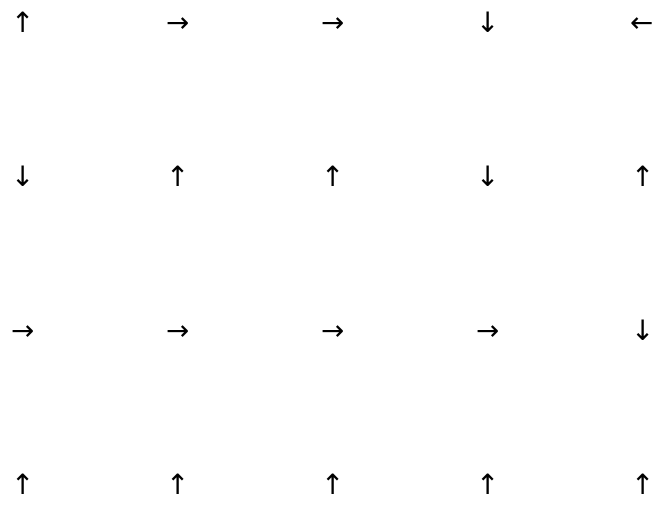

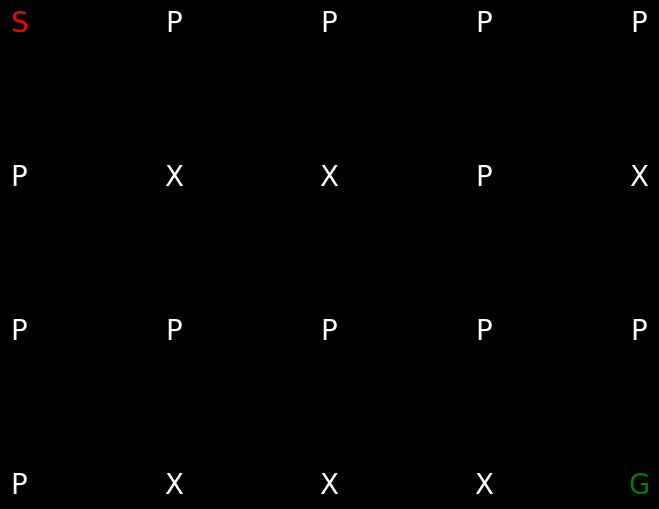

In [65]:
#TODO: Visualize optimal policy as arrows
# Replace numbers with arrow characters
arrow_arr = np.full_like(policy, '', dtype=np.dtype('<U2'))
arrow_arr[policy == 0] = '↑'
arrow_arr[policy == 1] = '↓'
arrow_arr[policy == 2] = '←'
arrow_arr[policy == 3] = '→'
print(arrow_arr)


fig, ax = plt.subplots(figsize=(2,2))
ax.axis('off')
ax.invert_yaxis()
for (i, j), arrow in np.ndenumerate(arrow_arr):
    ax.text(j, i, arrow, ha='center', va='center', fontsize=20)

plt.show()

#TODO: Show the maze. show start state (S) in red, goal state(G) in green, obstacles(X) in white, and Path (P) in white

maze_in_chars = np.full_like(maze, '', dtype=np.dtype('<U2'))
maze_in_chars[maze == 0] = 'P'
maze_in_chars[maze == 1] = 'X'
maze_in_chars[maze == 2] = 'S'
maze_in_chars[maze == 3] = 'G'

fig, ax = plt.subplots(figsize=(2, 2),facecolor='black')
ax.axis('off')
ax.invert_yaxis()

for (i, j), arrow in np.ndenumerate(maze_in_chars):
    text_obj = ax.text(j, i, arrow, ha='center', va='center', fontsize=20)
    if arrow == 'S':
        text_obj.set_color('red')
    elif arrow == 'X' or arrow == 'P':
        text_obj.set_color('white')
    elif arrow == 'G':
        text_obj.set_color('green')

plt.show()

